# Recurrent Neural Networks
---

In [1]:
import numpy as np
import matplotlib.pyplot as plt

---
### Implement Tanh and Softmax

**Exercise 1 [0.5/0.5]**:
1. Implement class `Tanh`.

In [2]:
class Tanh:

    def __init__(self):
        pass

    def forward(self, x):
        return np.tanh(x)

    def derivative(self, x):
        return 1 - np.tanh(x) ** 2

    def __call__(self, x):
        return self.forward(x)

In [3]:
act = Tanh()
np.random.seed(1)
x = np.random.randn(2,3)

In [4]:
print(f"act(x) =\n {act(x)}")
print(f"act.derivative(x) =\n {act.derivative(x)}")

act(x) =
 [[ 0.92525207 -0.5453623  -0.48398233]
 [-0.79057703  0.69903334 -0.98015695]]
act.derivative(x) =
 [[0.1439086  0.70257996 0.76576111]
 [0.37498795 0.51135239 0.03929236]]


**Exercise 2 [0.5/0.5]**:
1. Implement softmax.

In [5]:
def softmax(x):

    exp_x = np.exp(x - np.max(x, axis = 1, keepdims = True))
    softmax = exp_x / np.sum(exp_x, axis = 1, keepdims = True)

    return softmax

In [6]:
np.random.seed(1)
x = np.random.randn(4,5)
y = softmax(x)

In [7]:
print(f"softmax(x) =\n {y}")
print(f"sum of y for each sample =\n {np.sum(y, axis = 1, keepdims = True)}")

softmax(x) =
 [[0.56862917 0.06077185 0.06606977 0.0383178  0.26621141]
 [0.01185074 0.67772435 0.05529718 0.16287255 0.09225519]
 [0.48184163 0.01423021 0.08089001 0.07605473 0.34698342]
 [0.07524367 0.19022258 0.09395018 0.2357653  0.40481828]]
sum of y for each sample =
 [[1.]
 [1.]
 [1.]
 [1.]]


---
### Implement Recurrent Neural Network

**Exercise 3 [2/2]**:
1. Implement `initialize_rnn_parameters` to randomly initilaize weights `Wx`, `Wy`, `Wh`, and biases `bh` and `by`.
2. Return a dictionary `parameters` that contains all parameters.

In [8]:
def initialize_rnn_parameters(n_x, n_h, n_y):

    parameters = {}

    Wx = np.random.randn(n_h, n_x) * np.sqrt(2 / (n_x + n_h))
    Wh = np.random.randn(n_h, n_h) * np.sqrt(2 / (n_h + n_h))
    Wy = np.random.randn(n_y, n_h) * np.sqrt(2 / (n_y + n_h))
    bh = np.zeros((n_h, 1))
    by = np.zeros((n_y, 1))

    parameters['Wx'] = Wx
    parameters['Wh'] = Wh
    parameters['Wy'] = Wy
    parameters['bh'] = bh
    parameters['by'] = by

    return parameters

In [9]:
n_x = 3
n_h = 9
n_y = 5
np.random.seed(1)
parameters = initialize_rnn_parameters(n_x, n_h, n_y)

In [10]:
print("Wx:", parameters['Wx'])
print("Wh:", parameters['Wh'])
print("Wy:", parameters['Wy'])

Wx: [[ 0.66313622 -0.24974851 -0.21562521]
 [-0.43803761  0.35330119 -0.93959924]
 [ 0.71231642 -0.31076142  0.13024717]
 [-0.10180503  0.59690307 -0.84104892]
 [-0.13162627 -0.15678953  0.46285944]
 [-0.44902873 -0.07039352 -0.3583842 ]
 [ 0.01723369  0.23793331 -0.4493259 ]
 [ 0.4673315   0.36807287  0.20514245]
 [ 0.3677729  -0.27913073 -0.05016972]]
Wh: [[-0.31192314 -0.08929603  0.17678516 -0.23055358 -0.13225118 -0.22905757
  -0.28173521 -0.22374871 -0.00422153]
 [-0.37243678  0.07813857  0.55326739  0.24734805 -0.06394518 -0.29587632
  -0.24905276  0.56415153  0.01693592]
 [-0.21233188  0.06363849  0.70008505  0.04005298  0.20573437  0.10005677
  -0.11741662 -0.3808394  -0.11644757]
 [-0.06963141  0.19554106  0.27966114  0.31036736  0.09519578  0.29504705
  -0.25146598  0.41762272  0.17097661]
 [-0.09936428  0.16283938 -0.02519057  0.3772098   0.50660561  0.72852514
  -0.46549878 -0.48137127 -0.16815529]
 [ 0.05334569  0.29205631  0.10521165 -0.67406707 -0.102068    0.27599155
 

---
### RNN Layer

**Exercise 4 [2/2]**:
1. Implement one layer RNN `rnn_layer` with input `x_t` and `h_prev`, and `parameters`.
2. Return the `yhat_t`, `h_t`, and `z_t`.

In [11]:
def rnn_layer(x_t, h_prev, parameters, act = Tanh()):

    Wh = parameters['Wh']
    Wx = parameters['Wx']
    Wy = parameters['Wy']
    bh = parameters['bh']
    by = parameters['by']

    z_t = np.dot(Wh, h_prev.T).T + np.dot(Wx, x_t.T).T + bh.T
    h_t = act(z_t)
    u_t = np.dot(Wy, h_t.T).T + by.T
    yhat_t = softmax(u_t)

    return yhat_t, h_t, z_t

In [12]:
batch_size = 2
np.random.seed(1)
x = np.random.randn(batch_size, n_x)
pre_h = np.random.randn(batch_size, n_h)
y_t, h_t, z_t = rnn_layer(x, pre_h, parameters)

In [13]:
print("y_t.shape:", y_t.shape)
print("y_t:", y_t)

y_t.shape: (2, 5)
y_t: [[0.11065074 0.18737187 0.36453136 0.19970539 0.13774064]
 [0.11864454 0.60720197 0.04573351 0.10366995 0.12475003]]


---
### RNN Forward Pass

**Exercise 5 [2/2]**:
1. Implement `forward()` by stackin the `rnn_layer`.
2. Return the outputs `yhats` and `cache` that stores `hs`, `zs`, `yhats`, and `inputs`.

In [14]:
def forward(inputs, parameters, act = Tanh()):

    batch_size, sequence_length, input_size = inputs.shape
    hidden_size = parameters['Wh'].shape[0]
    output_size = parameters['Wy'].shape[0]

    yhats = np.zeros((batch_size, sequence_length, output_size))
    hs = np.zeros((batch_size, sequence_length, hidden_size))
    zs = np.zeros((batch_size, sequence_length, hidden_size))

    h_prev = np.zeros((batch_size, hidden_size))

    for t in range(sequence_length):

        x_t = inputs[:, t, :]
        yhat_t, h_t, z_t = rnn_layer(x_t, h_prev, parameters, act)

        yhats[:, t, :] = yhat_t
        hs[:, t, :] = h_t
        zs[:, t, :] = z_t
        h_prev = h_t

    cache = {'inputs': inputs, 'hs': hs, 'zs': zs, 'yhats': yhats}

    return yhats, cache

In [15]:
batch_size = 7
sequence_length = 2
n_x = 3
n_h = 9
n_y = 5
np.random.seed(1)
x = np.random.randn(batch_size, sequence_length, n_x)
parameters = initialize_rnn_parameters(n_x, n_h, n_y)
outputs, cache = forward(x, parameters)

In [16]:
print("y_pred.shape:", outputs.shape)
print("y_pred:", outputs)

y_pred.shape: (7, 2, 5)
y_pred: [[[0.39260451 0.31788106 0.11125198 0.11496241 0.06330004]
  [0.39098764 0.13642694 0.27785873 0.10241868 0.09230802]]

 [[0.28393407 0.33833283 0.13566298 0.14268575 0.09938437]
  [0.3175509  0.169947   0.27020246 0.14134367 0.10095597]]

 [[0.10801688 0.18018109 0.17736419 0.23857554 0.2958623 ]
  [0.33312266 0.24848178 0.17355368 0.13952846 0.10531342]]

 [[0.28793629 0.16850319 0.23487229 0.15892815 0.14976008]
  [0.08063801 0.09994124 0.22107313 0.22526857 0.37307905]]

 [[0.33716084 0.30794184 0.12382322 0.14271757 0.08835654]
  [0.17844986 0.14700902 0.27146238 0.1989327  0.20414604]]

 [[0.35335687 0.22156155 0.15889795 0.15396434 0.11221929]
  [0.27123241 0.15917378 0.16922405 0.20133283 0.19903693]]

 [[0.049228   0.07990321 0.22708698 0.20573746 0.43804435]
  [0.29412728 0.37569866 0.10101371 0.14087987 0.08828048]]]


---
### Compute Cost

**Exercise 6 [1/1]**:
1. Implement the `compute_cost()`

In [17]:
def compute_cost(targets, outputs):

    batch_size, sequence_length, output_size = targets.shape
    loss = -np.sum(targets * np.log(outputs + 1e-9)) / (batch_size * sequence_length)

    return loss

In [18]:
def generate_one_hot_targets(batch_size, sequence_length, n_y):

    random_class_indices = np.random.randint(0, n_y, size=(batch_size, sequence_length))
    one_hot_targets = np.zeros((batch_size, sequence_length, n_y))
    one_hot_targets[np.arange(batch_size)[:, None], np.arange(sequence_length), random_class_indices] = 1

    return one_hot_targets

In [19]:
np.random.seed(1)
targets = generate_one_hot_targets(batch_size, sequence_length, n_y)
loss = compute_cost(targets, outputs)

In [20]:
print("loss:", loss)

loss: 1.7195981586537232


---
### Backpropogation

**Exercise 7 [3/3]**:
1. Implement `backward()` method and return `grads`.

In [21]:
def backward(y, parameters, caches, act_derivative = Tanh().derivative):

    batch_size, sequence_length, output_size = y.shape
    hidden_size = parameters['Wh'].shape[0]
    input_size = parameters['Wx'].shape[1]

    Wy = parameters['Wy']
    Wh = parameters['Wh']
    Wx = parameters['Wx']
    bh = parameters['bh']
    by = parameters['by']

    dWh = np.zeros_like(parameters['Wh'])
    dWx = np.zeros_like(parameters['Wx'])
    dWy = np.zeros_like(parameters['Wy'])
    dbh = np.zeros_like(parameters['bh'])
    dby = np.zeros_like(parameters['by'])

    grads ={}

    dz_t_next = np.zeros((batch_size, hidden_size))

    for t in reversed(range(sequence_length)):

        yhat_t = caches['yhats'][:, t, :]
        h_t = caches['hs'][:, t, :]
        z_t = caches['zs'][:, t, :]
        x_t = caches['inputs'][:, t, :]

        if t == 0:
            h_prev = np.zeros_like(h_t)
        else:
            h_prev = caches['hs'][:, t - 1, :]

        du_t = (yhat_t - y[:, t, :])
        dWy += np.dot(du_t.T, h_t)
        dby += np.sum(du_t, axis = 0, keepdims = True).T
        dh_t = np.dot(du_t, Wy) + np.dot(dz_t_next, Wh)
        dz_t = act_derivative(z_t) * dh_t
        dWh += np.dot(dz_t.T, h_prev)
        dWx += np.dot(dz_t.T, x_t)
        dbh += np.sum(dz_t, axis = 0, keepdims = True).T
        dz_t_next = dz_t

    grads['dWh'] = dWh
    grads['dWx'] = dWx
    grads['dWy'] = dWy
    grads['dbh'] = dbh
    grads['dby'] = dby

    return grads

In [22]:
grads = backward(targets, parameters, cache)

In [23]:
print("grads['dWx'].shape:", grads['dWx'].shape)
print("grads['dWx']:", grads['dWx'])

grads['dWx'].shape: (9, 3)
grads['dWx']: [[-0.1117084   1.03991698  0.20894596]
 [ 0.16740112 -0.24441044 -0.59931328]
 [-1.62187741  0.89455464  0.00774216]
 [ 0.57186727 -0.0082445  -0.72599377]
 [-0.5189895   1.5087214   0.39941107]
 [ 1.09137358 -0.72816065 -0.13620931]
 [-0.14729011 -0.00652853  0.50799089]
 [ 1.80332232 -1.10675443  0.23229909]
 [ 0.11993147  0.09749754  0.3566304 ]]


---
### Build RNN

**Exercise 8 [3/3]**:
1. Implement the `RecurrentNeuralNetwork` class.

In [24]:
class RecurrentNeuralNetwork:

    def __init__(self, input_size, output_size, hidden_size, act = Tanh()):

        self.input_size = input_size
        self.output_size = output_size
        self.hidden_size = hidden_size
        self.act = act
        self.initialize_parameters()

    def initialize_parameters(self):

        self.parameters = {}

        self.parameters = {'Wx': np.random.randn(self.hidden_size, self.input_size) * 0.01,
                           'Wh': np.random.randn(self.hidden_size, self.hidden_size) * 0.01,
                           'Wy': np.random.randn(self.output_size, self.hidden_size) * 0.01,
                           'bh': np.zeros((self.hidden_size, 1)),
                           'by': np.zeros((self.output_size, 1))}

    def forward(self, inputs):

        self.caches = {}

        outputs, self.caches = forward(inputs, self.parameters, self.act)

        return outputs

    def backward(self, y):

        self.grads = {}

        grads = backward(y, self.parameters, self.caches, act_derivative = self.act.derivative)

        self.grads = grads

    def __call__(self, inputs):
        return self.forward(inputs)

In [25]:
n_x = 3
n_h = 9
n_y = 5
batch_size = 4
sequence_length = 2
np.random.seed(1)
x = np.random.randn(batch_size, sequence_length, n_x)
y = generate_one_hot_targets(batch_size, sequence_length, n_y)
network = RecurrentNeuralNetwork(n_x, n_y, n_h)
outputs = network(x)

In [26]:
print(f"Shape of outputs: {outputs.shape}")
print(f"outputs = \n{outputs}")

Shape of outputs: (4, 2, 5)
outputs = 
[[[0.20007463 0.19989397 0.20016755 0.19984329 0.20002056]
  [0.19992392 0.20007329 0.19986634 0.20014015 0.19999629]]

 [[0.20009079 0.19988665 0.20018593 0.19981967 0.20001696]
  [0.1999734  0.20003867 0.19992188 0.20007985 0.19998619]]

 [[0.19999533 0.20001496 0.19998668 0.200007   0.19999603]
  [0.1999304  0.2000603  0.19990295 0.2001045  0.20000184]]

 [[0.19999158 0.20000482 0.19998109 0.20002312 0.19999939]
  [0.20007045 0.19994824 0.20007545 0.19991534 0.19999053]]]


In [27]:
network.backward(y)

In [28]:
print(f"Shape of grads: {network.grads['dWx'].shape}")
print(f"grads['dWx'] = \n{network.grads['dWx']}")

Shape of grads: (9, 3)
grads['dWx'] = 
[[ 0.00106604  0.00191151  0.00511145]
 [ 0.02482275  0.0103596  -0.00373341]
 [ 0.0033513  -0.03140067  0.03454248]
 [ 0.01059539 -0.02390682  0.05390469]
 [ 0.00488689 -0.01826391  0.02143217]
 [-0.00968909 -0.00792244 -0.00644608]
 [ 0.04704359 -0.00654624  0.04694317]
 [-0.00724413  0.0064121  -0.0288551 ]
 [ 0.00385035 -0.02768539 -0.0029171 ]]


---
### Training RNN using Gradient Descent

In [29]:
def gradient_descent_step(parameters, grads, learning_rate):

    for key in parameters.keys():
        parameters[key] -= learning_rate * grads[f'd{key}']

In [30]:
gradient_descent_step(network.parameters, network.grads, learning_rate = 0.01)

for key in network.parameters:
    print(f"{key} = \n{network.parameters[f'{key}']}")

Wx = 
[[-0.0005789  -0.00790017  0.00062598]
 [-0.01063729 -0.00274037  0.00541984]
 [ 0.01524909  0.01988078  0.00443658]
 [ 0.0010875  -0.00833558 -0.00815852]
 [ 0.00634418  0.0006579   0.03093401]
 [-0.00522773  0.00353506 -0.00419068]
 [-0.02285815  0.01761943 -0.00311137]
 [ 0.00853539  0.0208032   0.00555333]
 [ 0.00979959 -0.01894515 -0.00891908]]
Wh = 
[[ 3.30063866e-03  1.04860741e-02  1.34987300e-02  1.24567445e-02
  -6.91206464e-03  1.28108266e-02 -7.27027594e-03 -7.99183922e-03
  -3.56005264e-05]
 [ 5.12614623e-03 -1.67772248e-03  1.34623017e-02 -6.15515119e-03
  -7.42948807e-03  1.01594451e-02 -5.55063510e-03  4.36193658e-03
  -1.46751215e-03]
 [ 2.35356086e-04 -2.58525323e-03  1.83935398e-02 -1.93890389e-03
   1.57422856e-02  7.56761472e-03 -5.27751246e-03 -7.53395623e-03
   9.03191424e-04]
 [ 1.68177089e-02 -1.90835349e-03 -1.58980322e-03 -1.37303746e-02
   4.81522224e-04 -1.57045942e-02 -1.29577581e-02  7.45171629e-04
  -8.81613237e-03]
 [-2.32865003e-03 -9.55233654e-0

In [31]:
def train(network, inputs, targets, learning_rate = 0.01, max_iter = 100):

    losses = []

    for i in range(max_iter):
        outputs = network(inputs)
        losses.append(compute_cost(outputs, targets))
        network.backward(y)
        gradient_descent_step(network.parameters, network.grads, learning_rate)

        if i % 100 == 0:
            print(f"Iteration {i}: Loss = {losses[-1]}")

    return losses

In [32]:
n_x = 3
n_h = 100
n_y = 5
batch_size = 10
sequence_length = 50
np.random.seed(1)
x = np.random.randn(batch_size, sequence_length, n_x)
y = generate_one_hot_targets(batch_size, sequence_length, n_y)
network = RecurrentNeuralNetwork(n_x, n_y, n_h)
losses = train(network, x, y, learning_rate = 0.01, max_iter = 1000)

Iteration 0: Loss = 16.578447966220622
Iteration 100: Loss = 15.562869341054181
Iteration 200: Loss = 16.18602091473992
Iteration 300: Loss = 15.504928338738754
Iteration 400: Loss = 16.178349123201986
Iteration 500: Loss = 15.208196057469424
Iteration 600: Loss = 13.593963208640666
Iteration 700: Loss = 14.775343529377738
Iteration 800: Loss = 14.66187204590017
Iteration 900: Loss = 15.06392699159572


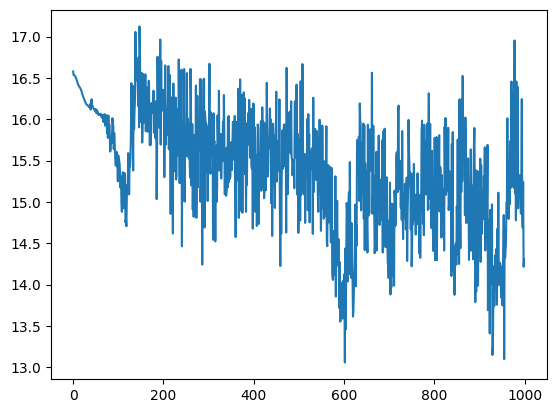

In [33]:
plt.plot(losses)
plt.show()